# Inference


In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scripts.spotify_api as spotify_api

# Apply the default theme
sns.set_theme()

In [2]:
# input track ID
track_id = ["4tekXLedu6wxNhHkKjFkPE", "1AfcE4lyIX7oDCHCPaKPg6"]

## Fetching track audio features


In [3]:
# get tracks meta
track_meta = spotify_api.get_tracks_metadata(track_id)
track_meta

,id,name,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,is_local,popularity,preview_url,track_number,type,uri
0,4tekXLedu6wxNhHkKjFkPE,Let's Vibe,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,193663,False,{'isrc': 'FXQ892400160'},{'spotify': 'https://open.spotify.com/track/4t...,False,54,https://p.scdn.co/mp3-preview/4bc677efe55ee736...,1,track,spotify:track:4tekXLedu6wxNhHkKjFkPE
1,1AfcE4lyIX7oDCHCPaKPg6,Stumble,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,121989,False,{'isrc': 'FXQ892300291'},{'spotify': 'https://open.spotify.com/track/1A...,False,48,https://p.scdn.co/mp3-preview/a53d30699a0e6019...,1,track,spotify:track:1AfcE4lyIX7oDCHCPaKPg6


In [4]:
# hit spotify API
af = spotify_api.get_audio_features(track_id)
af

,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature
0,0,0.843,0.700,4,-4.577,0,0.0783,0.246,0.000,0.2560,0.6380,110.009,4tekXLedu6wxNhHkKjFkPE,4
1,1,0.526,0.162,9,-14.679,0,0.0417,0.858,0.811,0.0861,0.0991,117.003,1AfcE4lyIX7oDCHCPaKPg6,4


In [5]:
# merge metadata and audio features
df = pd.merge(track_meta, af, on="id")
df

,id,name,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,4tekXLedu6wxNhHkKjFkPE,Let's Vibe,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,193663,False,{'isrc': 'FXQ892400160'},{'spotify': 'https://open.spotify.com/track/4t...,...,4,-4.577,0,0.0783,0.246,0.000,0.2560,0.6380,110.009,4
1,1AfcE4lyIX7oDCHCPaKPg6,Stumble,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,121989,False,{'isrc': 'FXQ892300291'},{'spotify': 'https://open.spotify.com/track/1A...,...,9,-14.679,0,0.0417,0.858,0.811,0.0861,0.0991,117.003,4


In [6]:
# extract artist name for easier reading
df["artist"] = df["artists"].apply(lambda x: x[0]["name"])
df

,id,name,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist
0,4tekXLedu6wxNhHkKjFkPE,Let's Vibe,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,193663,False,{'isrc': 'FXQ892400160'},{'spotify': 'https://open.spotify.com/track/4t...,...,-4.577,0,0.0783,0.246,0.000,0.2560,0.6380,110.009,4,FRENCHGRL
1,1AfcE4lyIX7oDCHCPaKPg6,Stumble,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,121989,False,{'isrc': 'FXQ892300291'},{'spotify': 'https://open.spotify.com/track/1A...,...,-14.679,0,0.0417,0.858,0.811,0.0861,0.0991,117.003,4,Majeur Mineur


## Data Preprocessing


In [7]:
# Selecting the relevant audio features
features = [
    "duration_ms",
    "popularity",
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "time_signature",
]
df[features]

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,193663,54,0.843,0.700,4,-4.577,0,0.0783,0.246,0.000,0.2560,0.6380,110.009,4
1,121989,48,0.526,0.162,9,-14.679,0,0.0417,0.858,0.811,0.0861,0.0991,117.003,4


In [8]:
# extracting independent variables
X = df[features]

In [9]:
# Load the label encoder, scaler, and other preprocessing objects
import pickle

with open("models/preprocessing.pkl", "rb") as f:
    preprocessing_objects = pickle.load(f)
    label_encoder = preprocessing_objects["label_encoder"]
    scaler = preprocessing_objects["scaler"]

label_encoder.classes_

array(['Electro chill', 'Hot Country', 'Summer Jazz', 'Trap Mojito',
       'hard Rock'], dtype=object)

In [10]:
# scale the features
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)
X_scaled

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,-0.130304,0.497848,2.16255,0.259767,-0.334539,0.725892,-1.263082,-0.036754,-0.265899,-0.836228,0.353406,1.671225,-0.370482,0.260076
1,-2.022970,0.053005,-0.09582,-1.375783,1.126628,-0.903711,-1.263082,-0.491085,1.198542,1.237406,-0.745745,-1.163059,-0.120082,0.260076


In [11]:
# dropping features from feature selection
# dropping loudness and acousticness
X_scaled.drop(columns=["loudness", "acousticness", "time_signature", "key", "mode"], inplace=True)
X_scaled

,duration_ms,popularity,danceability,energy,speechiness,instrumentalness,liveness,valence,tempo
0,-0.130304,0.497848,2.16255,0.259767,-0.036754,-0.836228,0.353406,1.671225,-0.370482
1,-2.022970,0.053005,-0.09582,-1.375783,-0.491085,1.237406,-0.745745,-1.163059,-0.120082


## inference


In [12]:
# building model class
import torch
import scripts.modeling as modeling

input_size = X_scaled.shape[1]
output_size = len(label_encoder.classes_)
hidden_sizes = [8, 8]

model = modeling.NeuralNet(input_size, hidden_sizes, output_size)
model

NeuralNet(
  (layers): ModuleList(
    (0): Linear(in_features=9, out_features=8, bias=True)
    (1): Dropout(p=0.1, inplace=False)
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=8, out_features=5, bias=True)
  )
)

In [13]:
# Load the trained weights
model.load_state_dict(torch.load("models/neural_net_model.pth", weights_only=True))
# Set the model to evaluation mode
model.eval()

NeuralNet(
  (layers): ModuleList(
    (0): Linear(in_features=9, out_features=8, bias=True)
    (1): Dropout(p=0.1, inplace=False)
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=8, out_features=5, bias=True)
  )
)

In [14]:
# converting the input to tensor
X_tensor = torch.tensor(X_scaled.values, dtype=torch.float32)
X_tensor

tensor([[-0.1303,  0.4978,  2.1625,  0.2598, -0.0368, -0.8362,  0.3534,  1.6712,
         -0.3705],
        [-2.0230,  0.0530, -0.0958, -1.3758, -0.4911,  1.2374, -0.7457, -1.1631,
         -0.1201]])

In [15]:
# inference
with torch.no_grad():
    y_logit = model(X_tensor)
    y_prob = torch.softmax(y_logit, dim=1)
    y_pred = torch.argmax(y_logit, dim=1)
    y_pred = label_encoder.inverse_transform(y_pred.numpy())

In [16]:
# creating dict of genre and predicted probability for each entry in the list
genre_probs = []
for i in range(len(y_prob)):
    genre_prob = dict(zip(label_encoder.classes_, y_prob[i].numpy().tolist()))
    genre_probs.append(genre_prob)
genre_probs

[{'Electro chill': 0.6360436081886292,
  'Hot Country': 0.02532828040421009,
  'Summer Jazz': 0.03894244506955147,
  'Trap Mojito': 0.24732254445552826,
  'hard Rock': 0.05236312374472618},
 {'Electro chill': 0.028277317062020302,
  'Hot Country': 0.003739164909347892,
  'Summer Jazz': 0.9646579623222351,
  'Trap Mojito': 0.0011533255456015468,
  'hard Rock': 0.002172330627217889}]

In [17]:
# saving data in orginial dataframe
df["predicted_label"] = y_pred
df["predicted_probability"] = y_prob.max(dim=1).values.numpy()
df["all_probabilities"] = genre_probs

In [18]:
# output the results
df[["name", "artist", "predicted_label", "predicted_probability"]]

,name,artist,predicted_label,predicted_probability
0,Let's Vibe,FRENCHGRL,Electro chill,0.636044
1,Stumble,Majeur Mineur,Summer Jazz,0.964658


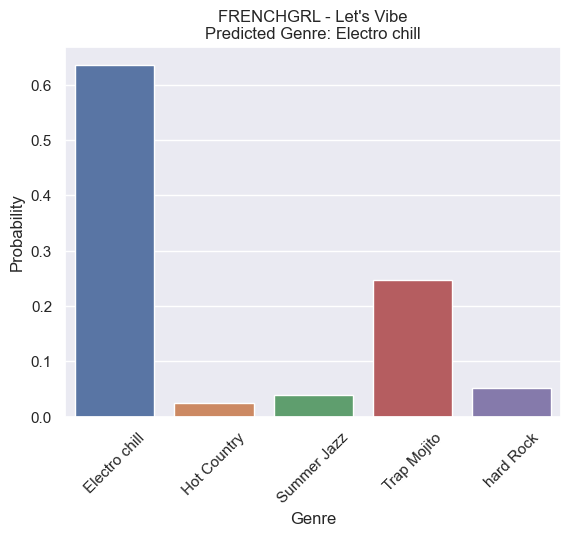

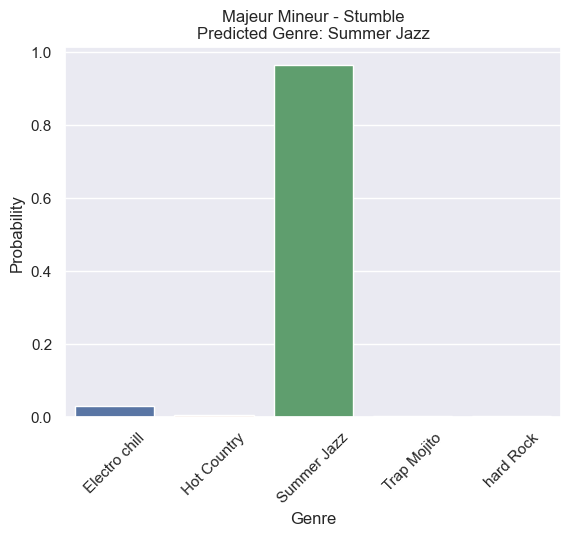

In [19]:
# looping through tracks and plotting probabilities
for i in range(len(df)):
    track = df.iloc[i]
    sns.barplot(
        x=label_encoder.classes_, y=track["all_probabilities"].values(), hue=label_encoder.classes_, dodge=False
    )
    plt.title(f"{track['artist']} - {track['name']}\nPredicted Genre: {track['predicted_label']}")
    plt.ylabel("Probability")
    plt.xlabel("Genre")
    plt.xticks(rotation=45)
    plt.show()

## Should a track be included in playlist?


In [20]:
# playlist name
target_playlist_name = "hard Rock"
track_id = "4tekXLedu6wxNhHkKjFkPE"

In [21]:
# getting the predicted probability that the track belongs to the playlist
proba = df[df["id"] == track_id]["all_probabilities"].values[0][target_playlist_name]
round(proba, 2)

0.05

In [22]:
# we can now set a flag
include_in_playlist = proba > 0.75
include_in_playlist

False

In [23]:
# we can also run in batch in the dataframe for all tracks
target_playlist_df = df[["id", "name", "artist", "all_probabilities"]].copy()
target_playlist_df["target_playlist_name"] = target_playlist_name
target_playlist_df["target_playlist_probability"] = target_playlist_df["all_probabilities"].apply(
    lambda x: x[target_playlist_name]
)
target_playlist_df["include_in_playlist"] = target_playlist_df["target_playlist_probability"] > 0.75
target_playlist_df

,id,name,artist,all_probabilities,target_playlist_name,target_playlist_probability,include_in_playlist
0,4tekXLedu6wxNhHkKjFkPE,Let's Vibe,FRENCHGRL,"{'Electro chill': 0.6360436081886292, 'Hot Cou...",hard Rock,0.052363,False
1,1AfcE4lyIX7oDCHCPaKPg6,Stumble,Majeur Mineur,"{'Electro chill': 0.028277317062020302, 'Hot C...",hard Rock,0.002172,False


## Testing the py script


In [24]:
# input df
df

,id,name,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist,predicted_label,predicted_probability,all_probabilities
0,4tekXLedu6wxNhHkKjFkPE,Let's Vibe,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,193663,False,{'isrc': 'FXQ892400160'},{'spotify': 'https://open.spotify.com/track/4t...,...,0.246,0.000,0.2560,0.6380,110.009,4,FRENCHGRL,Electro chill,0.636044,"{'Electro chill': 0.6360436081886292, 'Hot Cou..."
1,1AfcE4lyIX7oDCHCPaKPg6,Stumble,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,121989,False,{'isrc': 'FXQ892300291'},{'spotify': 'https://open.spotify.com/track/1A...,...,0.858,0.811,0.0861,0.0991,117.003,4,Majeur Mineur,Summer Jazz,0.964658,"{'Electro chill': 0.028277317062020302, 'Hot C..."


In [25]:
modeling.model_inference(df, model=model, scaler=scaler, label_encoder=label_encoder)

,id,name,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist,predicted_label,predicted_probability,all_probabilities
0,4tekXLedu6wxNhHkKjFkPE,Let's Vibe,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,193663,False,{'isrc': 'FXQ892400160'},{'spotify': 'https://open.spotify.com/track/4t...,...,0.246,0.000,0.2560,0.6380,110.009,4,FRENCHGRL,Electro chill,0.636044,"{'Electro chill': 0.6360436081886292, 'Hot Cou..."
1,1AfcE4lyIX7oDCHCPaKPg6,Stumble,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,121989,False,{'isrc': 'FXQ892300291'},{'spotify': 'https://open.spotify.com/track/1A...,...,0.858,0.811,0.0861,0.0991,117.003,4,Majeur Mineur,Summer Jazz,0.964658,"{'Electro chill': 0.028277317062020302, 'Hot C..."


In [26]:
# should we include the track in the playlist?
playlist_name = "hard Rock"
modeling.include_tracks_to_playlist(
    df, model=model, scaler=scaler, label_encoder=label_encoder, target_playlist_name=playlist_name
)

,id,name,artist,all_probabilities,target_playlist_name,target_playlist_probability,include_in_playlist
0,4tekXLedu6wxNhHkKjFkPE,Let's Vibe,FRENCHGRL,"{'Electro chill': 0.6360436081886292, 'Hot Cou...",hard Rock,0.052363,False
1,1AfcE4lyIX7oDCHCPaKPg6,Stumble,Majeur Mineur,"{'Electro chill': 0.028277317062020302, 'Hot C...",hard Rock,0.002172,False


In [27]:
# should we include the track in the playlist?
playlist_name = "Electro chill"
modeling.include_tracks_to_playlist(
    df,
    model=model,
    scaler=scaler,
    label_encoder=label_encoder,
    target_playlist_name=playlist_name,
    probability_threshold=0.7,
)

,id,name,artist,all_probabilities,target_playlist_name,target_playlist_probability,include_in_playlist
0,4tekXLedu6wxNhHkKjFkPE,Let's Vibe,FRENCHGRL,"{'Electro chill': 0.6360436081886292, 'Hot Cou...",Electro chill,0.636044,False
1,1AfcE4lyIX7oDCHCPaKPg6,Stumble,Majeur Mineur,"{'Electro chill': 0.028277317062020302, 'Hot C...",Electro chill,0.028277,False
